The 2018 lower East Rift Zone eruption of Kilauea Volcano began in the late afternoon of 3 May, with fissure 1 opening and erupting lava onto Mohala Street in the Leilani Estates subdivision, part of the lower Puna District of the Island of Hawai'i. For the first week of the eruption, relatively viscous lava flowed only within a kilometer (0.6 miles) of the fissures within Leilani Estates, before activity shifted downrift (east-northeast) and out of the subdivision during mid-May. Around 18 May, activity along the lower East Rift Zone intensified, and fluid lava erupting at higher effusion rates from the downrift fissures reached the ocean within two days. Near the end of May, this more vigorous activity shifted back uprift into Leilani Estates, where fissure 8 reactivated with lava fountains feeding several 'a'a flows. The southernmost flow lobe developed into a well-defined lava channel and reached the ocean at Kapoho Bay - 11 kilometers (7 miles) away - on 3 June. Fissure 8 continued supplying this lava channel for more than two months, constructing an approximately 3.5-square-kilometer (1.4-square-mile) lava delta along the coastline. Over 4 and 5 August, activity at fissure 8 waned and flow in the lava channel came to a halt, only to be followed by weak activity within the vent in late August and early September. By then, the eruption had covered 35.5 square kilometers (13.7 square miles) of the lower Puna District with lava. In this report, the authors have sought to chronicle this sequence of events using geospatial data in the form of an Esri file geodatabase, Esri shapefiles, and Google Earth KMZs.


In [1]:
import asf_search as asf
import pandas as pd
import geopandas as gpd
import numpy as np
import xarray as xr
import rioxarray as rxr
import matplotlib.pyplot as plt

In [2]:
!ls data/kil/Eruption/*.shp

data/kil/Eruption/KIL_2018_LERZ_Fissure08TephraIsoLines.shp
data/kil/Eruption/KIL_2018_LERZ_Fissure08TephraPolys.shp
data/kil/Eruption/KIL_2018_LERZ_FissureLines.shp
data/kil/Eruption/KIL_2018_LERZ_FlowChronologyLines.shp
data/kil/Eruption/KIL_2018_LERZ_FlowChronologyPolys.shp
data/kil/Eruption/KIL_2018_LERZ_FlowFootprint.shp
data/kil/Eruption/KIL_2018_LERZ_FlowsOverlap.shp
data/kil/Eruption/KIL_2018_LERZ_FlowsOverlapLines.shp
data/kil/Eruption/KIL_2018_LERZ_SampleSites.shp


https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2011GC004016

https://www.geoplatform.gov/metadata/56a60fb4-e492-4197-b87b-f48562b3c46e

In [3]:
gf_flow_footprint = gpd.read_file("data/kil/Eruption/KIL_2018_LERZ_FlowFootprint.shp")

ERROR 1: /home/jehayes/mambaforge/lib/gdalplugins/../libtiledb.so.2.25: undefined symbol: _ZNK3Aws2S38S3Client11ListBucketsEv
ERROR 1: /home/jehayes/mambaforge/lib/gdalplugins/../libtiledb.so.2.25: undefined symbol: _ZNK3Aws2S38S3Client11ListBucketsEv
ERROR 1: /home/jehayes/mambaforge/lib/gdalplugins/ogr_PG.so: undefined symbol: _Z35OGRPGCommonGenerateSpatialIndexNameB5cxx11PKcS0_i
ERROR 1: /home/jehayes/mambaforge/lib/gdalplugins/ogr_PG.so: undefined symbol: _Z35OGRPGCommonGenerateSpatialIndexNameB5cxx11PKcS0_i


In [4]:
gf_flow_footprint

,DataSource,Shape_Leng,Shape_Area,geometry
0,Dissolved from FlowChronologyPolys features.,929.710781,1.303798e+04,"POLYGON ((298047.165 2152128.067, 298029.861 2..."
1,Dissolved from FlowChronologyPolys features.,226.109214,2.297918e+03,"POLYGON ((298139.175 2152188.94, 298131.362 21..."
2,Dissolved from FlowChronologyPolys features.,15.366866,1.260094e+01,"POLYGON ((298315.525 2152319.576, 298311.821 2..."
3,Dissolved from FlowChronologyPolys features.,278.345818,1.602255e+03,"POLYGON ((298398.869 2152339.685, 298399.398 2..."
4,Dissolved from FlowChronologyPolys features.,124.962211,9.740080e+02,"POLYGON ((298501.918 2152409.364, 298504.3 215..."
5,Dissolved from FlowChronologyPolys features.,78.918761,2.398704e+02,"POLYGON ((298536.844 2152412.539, 298546.898 2..."
6,Dissolved from FlowChronologyPolys features.,167.617490,6.984002e+02,"POLYGON ((298782.597 2152539.434, 298779.686 2..."
7,Dissolved from FlowChronologyPolys features.,1095.084172,1.164085e+04,"POLYGON ((299043.979 2152662.73, 299044.376 21..."
8,Dissolved from FlowChronologyPolys features.,147384.666793,3.562006e+07,"POLYGON ((307224.927 2158656.29, 307232.057 21..."


In [5]:
gf_flow_footprint.crs

<Projected CRS: EPSG:26905>
Name: NAD83 / UTM zone 5N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United States (USA) - between 156°W and 150°W onshore and offshore - Alaska, Hawaii.
- bounds: (-156.0, 15.56, -149.99, 74.71)
Coordinate Operation:
- name: UTM zone 5N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [6]:
gf_flow_footprint.explore()

![](images/kil_2018_vertex.png)

we just wamt May 3 2018 - Aug 5 2018

OPERA CSLC burst ids (west to east): T087_185682_IW1, T124_264305_IW3

In [7]:
search_wkt = gf_flow_footprint.to_crs(4326).union_all().envelope.wkt

In [8]:
parms = {
        'dataset':asf.DATASET.OPERA_S1,
        'processingLevel':asf.PRODUCT_TYPE.CSLC,
        'intersectsWith':search_wkt,
        'operaBurstID':['T087_185682_IW1', 'T124_264305_IW3'],
        'start':'2018-04-01T00:00:00Z',
        'end':'2018-08-17T00:00:00Z',
        'maxResults':100,
}
test = asf.search(**parms)

In [9]:
len(test)

40

In [10]:
test[21].properties

{'centerLat': 19.47772790457071,
 'centerLon': -154.78592597381154,
 'stopTime': '2018-06-13T04:30:06Z',
 'fileID': 'OPERA_L2_CSLC-S1_T124-264305-IW3_20180613T043003Z_20240430T002345Z_S1B_VV_v1.1',
 'flightDirection': 'ASCENDING',
 'pathNumber': 124,
 'processingLevel': 'CSLC',
 'url': 'https://datapool.asf.alaska.edu/CSLC/OPERA-S1/OPERA_L2_CSLC-S1_T124-264305-IW3_20180613T043003Z_20240430T002345Z_S1B_VV_v1.1.h5',
 'startTime': '2018-06-13T04:30:03Z',
 'sceneName': 'OPERA_L2_CSLC-S1_T124-264305-IW3_20180613T043003Z_20240430T002345Z_S1B_VV_v1.1',
 'browse': ['https://datapool.asf.alaska.edu/BROWSE/OPERA-S1/OPERA_L2_CSLC-S1_T124-264305-IW3_20180613T043003Z_20240430T002345Z_S1B_VV_v1.1_BROWSE.png',
  's3://asf-cumulus-prod-opera-browse/OPERA_L2_CSLC-S1/OPERA_L2_CSLC-S1_T124-264305-IW3_20180613T043003Z_20240430T002345Z_S1B_VV_v1.1/OPERA_L2_CSLC-S1_T124-264305-IW3_20180613T043003Z_20240430T002345Z_S1B_VV_v1.1_BROWSE.png',
  'https://datapool.asf.alaska.edu/BROWSE/OPERA-S1/OPERA_L2_CSLC-S1_T

In [11]:
all_urls = [url for t in test for url in [t.properties['url']]]

In [ ]:
asf.download_urls(urls=all_urls[2:], path='opera/cslc')

https://github.com/scottyhq/opera/tree/main

In [20]:
fn_1 = "opera/cslc/OPERA_L2_CSLC-S1_T087-185682-IW1_20180809T161540Z_20240428T125546Z_S1B_VV_v1.1.h5"
fn_2 = "opera/cslc/OPERA_L2_CSLC-S1_T087-185682-IW1_20180815T161623Z_20240428T143339Z_S1A_VV_v1.1.h5"

In [25]:
#!gdalinfo $fn_1

In [21]:
dsR = xr.open_dataset(fn_1,
                      group='data',
                      engine='h5netcdf')['VV'].rename(dict(x_coordinates='x', y_coordinates='y'))

tR = pd.to_datetime(xr.open_dataset(fn_1, group='identification')['zero_doppler_start_time'].data.astype('U'))
print(tR)
print(dsR)

2018-08-09 16:15:40.828737
<xarray.DataArray 'VV' (y: 4950, x: 19830)> Size: 785MB
[98158500 values with dtype=complex64]
Coordinates:
  * x        (x) float64 159kB 2.487e+05 2.487e+05 ... 3.478e+05 3.478e+05
  * y        (y) float64 40kB 2.18e+06 2.18e+06 2.18e+06 ... 2.13e+06 2.13e+06
Attributes:
    description:   VV geocoded CSLC image
    grid_mapping:  projection


In [26]:
dsS = xr.open_dataset(fn_2,
                      group='data',
                      engine='h5netcdf')['VV'].rename(dict(x_coordinates='x', y_coordinates='y'))

tS = pd.to_datetime(xr.open_dataset(fn_2, group='identification')['zero_doppler_start_time'].data.astype('U'))
print(tS)
dsS

2018-08-15 16:16:23.224180


<xarray.DataArray 'VV' (y: 4950, x: 19830)> Size: 785MB
[98158500 values with dtype=complex64]
Coordinates:
  * x        (x) float64 159kB 2.487e+05 2.487e+05 ... 3.478e+05 3.478e+05
  * y        (y) float64 40kB 2.18e+06 2.18e+06 2.18e+06 ... 2.13e+06 2.13e+06
Attributes:
    description:   VV geocoded CSLC image
    grid_mapping:  projection

In [27]:
# Plot amplitude and phase
ifg = dsR * np.conj(dsS)
ifg.attrs['reference'] = tR
ifg.attrs['secondary'] = tS
ifg

<xarray.DataArray 'VV' (y: 4950, x: 19830)> Size: 785MB
array([[nan+nanj, nan+nanj, nan+nanj, ..., nan+nanj, nan+nanj, nan+nanj],
       [nan+nanj, nan+nanj, nan+nanj, ..., nan+nanj, nan+nanj, nan+nanj],
       [nan+nanj, nan+nanj, nan+nanj, ..., nan+nanj, nan+nanj, nan+nanj],
       ...,
       [nan+nanj, nan+nanj, nan+nanj, ..., nan+nanj, nan+nanj, nan+nanj],
       [nan+nanj, nan+nanj, nan+nanj, ..., nan+nanj, nan+nanj, nan+nanj],
       [nan+nanj, nan+nanj, nan+nanj, ..., nan+nanj, nan+nanj, nan+nanj]],
      dtype=complex64)
Coordinates:
  * x        (x) float64 159kB 2.487e+05 2.487e+05 ... 3.478e+05 3.478e+05
  * y        (y) float64 40kB 2.18e+06 2.18e+06 2.18e+06 ... 2.13e+06 2.13e+06
Attributes:
    reference:  2018-08-09 16:15:40.828737
    secondary:  2018-08-15 16:16:23.224180

In [28]:
da = xr.apply_ufunc(np.angle, ifg)
ds = da.to_dataset(name='phase')
ds

<xarray.Dataset> Size: 393MB
Dimensions:  (x: 19830, y: 4950)
Coordinates:
  * x        (x) float64 159kB 2.487e+05 2.487e+05 ... 3.478e+05 3.478e+05
  * y        (y) float64 40kB 2.18e+06 2.18e+06 2.18e+06 ... 2.13e+06 2.13e+06
Data variables:
    phase    (y, x) float32 393MB nan nan nan nan nan ... nan nan nan nan nan

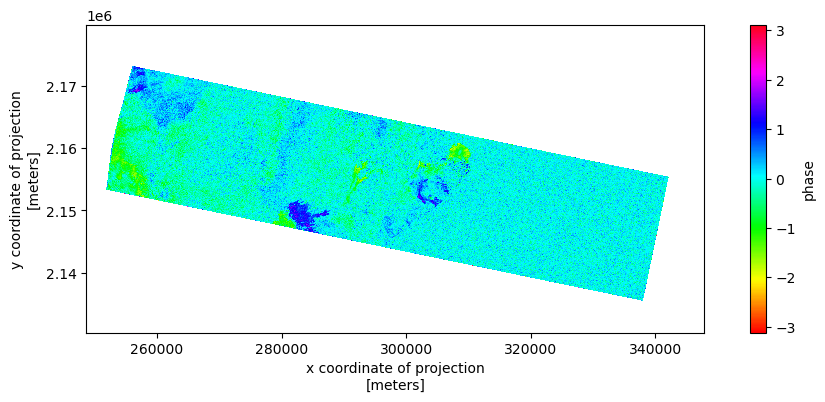

In [29]:
# 80meter posting for faster plots
nx=16
ny=8 

fig,ax = plt.subplots(figsize=(12,4))
ds.phase.coarsen(x=nx,y=ny, boundary='trim').mean().plot.imshow(cmap='hsv', ax=ax) #20m posting
plt.gca().set_aspect('equal')

In [30]:
def scale_amplitude(da):
    ''' decible scale for viz'''
    return 20*np.log10(np.abs(da))

ds['amplitude'] = xr.apply_ufunc(scale_amplitude, ifg)
ds

<xarray.Dataset> Size: 785MB
Dimensions:    (x: 19830, y: 4950)
Coordinates:
  * x          (x) float64 159kB 2.487e+05 2.487e+05 ... 3.478e+05 3.478e+05
  * y          (y) float64 40kB 2.18e+06 2.18e+06 2.18e+06 ... 2.13e+06 2.13e+06
Data variables:
    phase      (y, x) float32 393MB nan nan nan nan nan ... nan nan nan nan nan
    amplitude  (y, x) float32 393MB nan nan nan nan nan ... nan nan nan nan nan

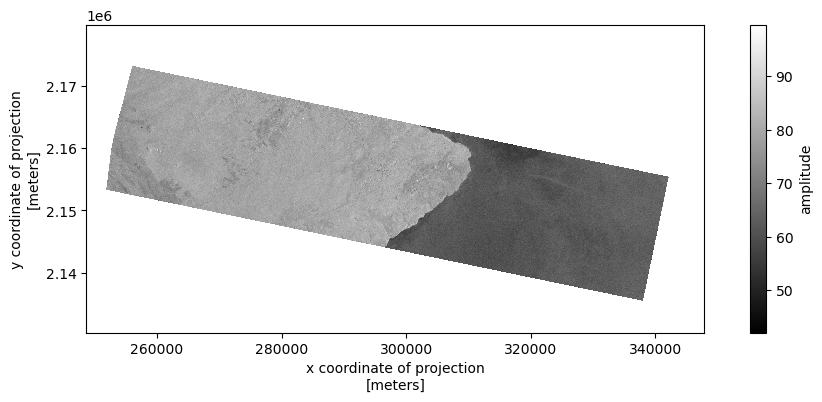

In [31]:
fig,ax = plt.subplots(figsize=(12,4))
ds.amplitude.coarsen(x=nx,y=ny, boundary='trim').mean().plot.imshow(cmap='gray', ax=ax) #20m posting
plt.gca().set_aspect('equal')

In [32]:
fn_1_w = "opera/cslc/OPERA_L2_CSLC-S1_T124-264305-IW3_20180806T043048Z_20240428T114558Z_S1A_VV_v1.1.h5"
fn_2_w = "opera/cslc/OPERA_L2_CSLC-S1_T124-264305-IW3_20180812T043006Z_20240428T133858Z_S1B_VV_v1.1.h5"
dsR_w = xr.open_dataset(fn_1_w,
                      group='data',
                      engine='h5netcdf')['VV'].rename(dict(x_coordinates='x', y_coordinates='y'))

tR_w = pd.to_datetime(xr.open_dataset(fn_1_w, 
                                      group='identification')['zero_doppler_start_time'].data.astype('U'))
dsS_w = xr.open_dataset(fn_2_w,
                      group='data',
                      engine='h5netcdf')['VV'].rename(dict(x_coordinates='x', y_coordinates='y'))

tS_w = pd.to_datetime(xr.open_dataset(fn_2_w, 
                                      group='identification')['zero_doppler_start_time'].data.astype('U'))

In [33]:
# Plot amplitude and phase
ifg_w = dsR_w * np.conj(dsS_w)
ifg_w.attrs['reference'] = tR_w
ifg_w.attrs['secondary'] = tS_w
da_w = xr.apply_ufunc(np.angle, ifg_w)
ds_w = da_w.to_dataset(name='phase')
ds_w['amplitude'] = xr.apply_ufunc(scale_amplitude, ifg_w)

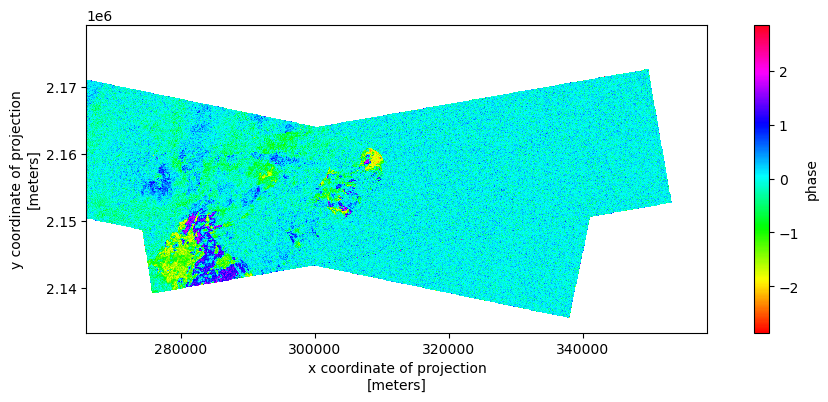

In [ ]:
nx=16
ny=8 

fig,ax = plt.subplots(figsize=(12,4))
ds.phase.coarsen(x=nx,y=ny, boundary='trim').mean().plot.imshow(cmap='hsv', ax=ax, 
                                                                add_colorbar=False) #20m posting
ds_w.phase.coarsen(x=nx,y=ny, boundary='trim').mean().plot.imshow(cmap='hsv', ax=ax) #20m posting
plt.gca().set_aspect('equal')

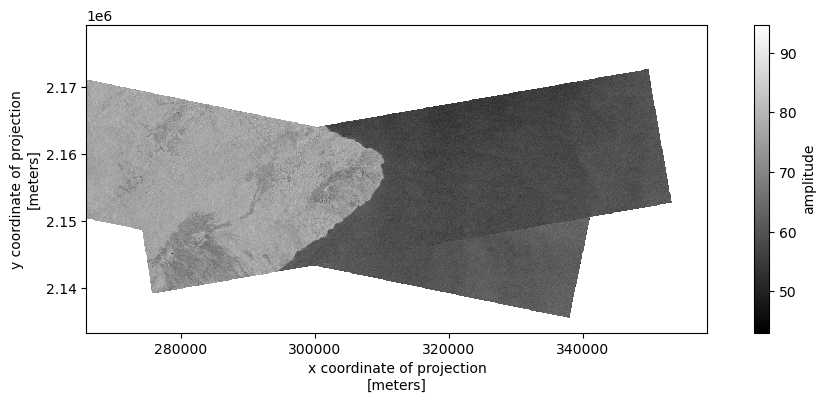

In [37]:
fig,ax = plt.subplots(figsize=(12,4))
ds.amplitude.coarsen(x=nx,y=ny, boundary='trim').mean().plot.imshow(cmap='gray', ax=ax,
                                                                    add_colorbar=False) #20m posting
ds_w.amplitude.coarsen(x=nx,y=ny, boundary='trim').mean().plot.imshow(cmap='gray', ax=ax) #20m posting
plt.gca().set_aspect('equal')